### Edgar Moises Hernandez-Gonzalez
#### 13/05/20-19/05/20
#### Regresion con CNN-1D, LSTM y GRU para predecir la funcion seno
##### Salida: Escalar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense

Using TensorFlow backend.


In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
#para predecir seno
datos = [-0.0000, -0.0634, -0.1266, -0.1893, -0.2511, -0.3120, -0.3717,
         -0.4298, -0.4862, -0.5406, -0.5929, -0.6428, -0.6901, -0.7346,
         -0.7761, -0.8146, -0.8497, -0.8815, -0.9096, -0.9341, -0.9549,
         -0.9718, -0.9848, -0.9938, -0.9989, -0.9999, -0.9969, -0.9898, 
         -0.9788, -0.9638, -0.9450, -0.9224, -0.8960, -0.8660, -0.8326, 
         -0.7958, -0.7557, -0.7127, -0.6668, -0.6182, -0.5671, -0.5137, 
         -0.4582, -0.4009, -0.3420, -0.2817, -0.2203, -0.1580, -0.0951,
         -0.0317, 0.0317, 0.0951, 0.1580, 0.2203, 0.2817, 0.3420, 0.4009,
         0.4582, 0.5137, 0.5671, 0.6182, 0.6668, 0.7127, 0.7557, 0.7958,
         0.8326, 0.8660, 0.8960, 0.9224, 0.9450, 0.9638, 0.9788, 0.9898,
         0.9969, 0.9999, 0.9989, 0.9938, 0.9848, 0.9718, 0.9549, 0.9341,
         0.9096, 0.8815, 0.8497, 0.8146, 0.7761, 0.7346, 0.6901, 0.6428,
         0.5929, 0.5406, 0.4862, 0.4298, 0.3717, 0.3120, 0.2511, 0.1893,
         0.1266, 0.0634, 0.0000]

In [4]:
len(datos)

100

In [0]:
len_samples = 7
x, y = split_sequence(datos, len_samples)

In [6]:
print(x.shape)
print(y.shape)

(93, 7)
(93,)


In [7]:
#convertir de 2D a 3D
x = x.reshape((x.shape[0], x.shape[1], 1))

print(x.shape)

(93, 7, 1)


In [0]:
# mse = 0.0243
def model_cnn_1d():
  model = Sequential()
  model.add(Conv1D(8, 3, activation='relu', input_shape=x.shape[1:]))
  model.add(MaxPool1D(2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 0.0362
def model_lstm():
  model = Sequential()
  model.add(LSTM(64, activation='tanh', input_shape=x.shape[1:]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
# mse = 0.0180
def model_gru():
  model = Sequential()
  model.add(GRU(64, activation='tanh', input_shape=x.shape[1:]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [0]:
#model = model_cnn_1d()
#model = model_lstm()
model = model_gru()

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x, y, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6151
Epoch 2/20
 - 0s - loss: 0.4685
Epoch 3/20
 - 0s - loss: 0.3511
Epoch 4/20
 - 0s - loss: 0.2445
Epoch 5/20
 - 0s - loss: 0.1589
Epoch 6/20
 - 0s - loss: 0.0934
Epoch 7/20
 - 0s - loss: 0.0487
Epoch 8/20
 - 0s - loss: 0.0263
Epoch 9/20
 - 0s - loss: 0.0252
Epoch 10/20
 - 0s - loss: 0.0322
Epoch 11/20
 - 0s - loss: 0.0378
Epoch 12/20
 - 0s - loss: 0.0356
Epoch 13/20
 - 0s - loss: 0.0292
Epoch 14/20
 - 0s - loss: 0.0236
Epoch 15/20
 - 0s - loss: 0.0206
Epoch 16/20
 - 0s - loss: 0.0205
Epoch 17/20
 - 0s - loss: 0.0210
Epoch 18/20
 - 0s - loss: 0.0214
Epoch 19/20
 - 0s - loss: 0.0212
Epoch 20/20
 - 0s - loss: 0.0205


In [14]:
test_loss = model.evaluate(x, y, verbose=2)
print('Test loss:', test_loss)

Test loss: 0.019947249502424273


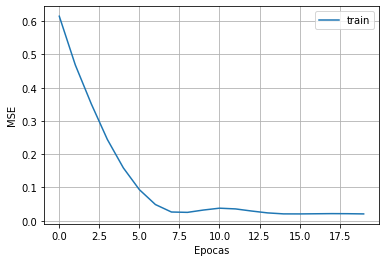

In [15]:
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.show()

In [0]:
y_pred_todo = model.predict(x)

In [17]:
df_y = pd.DataFrame(y, columns=['y'])
df_y_pred_todo = pd.DataFrame(y_pred_todo, columns=['predicciones todo'])
comparar = pd.concat([df_y, df_y_pred_todo], axis=1)
comparar

,y,predicciones todo
0,-0.4298,-0.197402
1,-0.4862,-0.256929
2,-0.5406,-0.315376
3,-0.5929,-0.372447
4,-0.6428,-0.427870
...,...,...
88,0.2511,0.444098
89,0.1893,0.391815
90,0.1266,0.337604
91,0.0634,0.281670


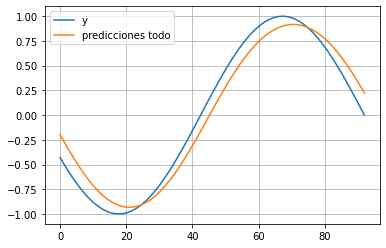

In [18]:
plt.plot(y)
plt.plot(y_pred_todo)
plt.grid()
plt.legend(['y', 'predicciones todo'])
plt.show()

In [19]:
num_test = 5
print("Etiqueta verdadera", y[num_test])
print("Etiqueta predicha", model.predict(x[num_test].reshape(1,len_samples,1)))

Etiqueta verdadera -0.6901
Etiqueta predicha [[-0.4813944]]
